# Network Analysis with Python (networkx) - Who owns the DOW JONES Industrial Average Equity Index?


In [3]:
pip install pandas

     ---------------------------------------- 10.0/10.0 MB 4.8 MB/s eta 0:00:00
  Using cached numpy-1.23.2-cp310-cp310-win_amd64.whl (14.6 MB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf

In [10]:
var1 = yf.Ticker('AAPL')

In [11]:
apple = var1.institutional_holders

In [12]:
apple['comp'] = var1.ticker

In [13]:
var2 =  yf.Ticker('MSFT')

In [14]:
msft =  var2.institutional_holders

In [15]:
msft['comp'] = var2.ticker

In [18]:
tog_ = pd.concat([apple,msft])

In [19]:
tog_

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",1277319054,2022-06-29,0.0795,201765326345,AAPL
1,Blackrock Inc.,1028688317,2022-06-29,0.0640,162491613459,AAPL
2,"Berkshire Hathaway, Inc",894802319,2022-06-29,0.0557,141342980316,AAPL
3,State Street Corporation,598178524,2022-06-29,0.0372,94488283667,AAPL
4,"FMR, LLC",344317974,2022-06-29,0.0214,54388469484,AAPL
5,"Geode Capital Management, LLC",278256192,2022-06-29,0.0173,43953349956,AAPL
6,Price (T.Rowe) Associates Inc,237910783,2022-06-29,0.0148,37580388879,AAPL
7,Morgan Stanley,182450565,2022-06-29,0.0114,28819892472,AAPL
8,Northern Trust Corporation,179828922,2022-06-29,0.0112,28405777726,AAPL
9,Bank of America Corporation,149133915,2022-06-29,0.0093,23557194214,AAPL


In [20]:
G = nx.from_pandas_edgelist(tog_, 'Holder', 'comp')

In [22]:
G.nodes()

NodeView(('Vanguard Group, Inc. (The)', 'AAPL', 'Blackrock Inc.', 'Berkshire Hathaway, Inc', 'State Street Corporation', 'FMR, LLC', 'Geode Capital Management, LLC', 'Price (T.Rowe) Associates Inc', 'Morgan Stanley', 'Northern Trust Corporation', 'Bank of America Corporation', 'Norges Bank Investment Management', 'MSFT', 'Capital World Investors', 'JP Morgan Chase & Company', 'Capital Research Global Investors', 'Capital International Investors'))

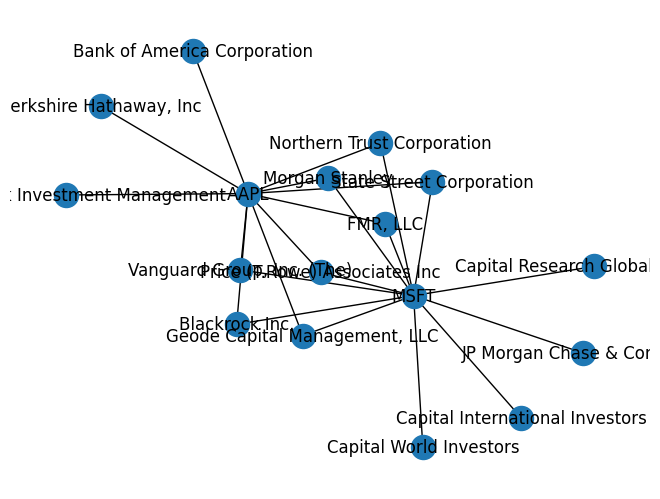

In [24]:
nx.draw(G, with_labels=True)

In [29]:
tickers = pd.read_html('http://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [30]:
tickers

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.88%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.56%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.88%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.15%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.40%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.19%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.05%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.00%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.28%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,2.32%


In [31]:
tickers = tickers.Symbol.to_list()

In [34]:
frames = []

for ticker in tickers:
    var =  yf.Ticker(ticker)
    frame = var.institutional_holders
    frame['comp'] = var.ticker
    frames.append(frame)

In [35]:
all_tog = pd.concat(frames)

In [36]:
all_tog

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",47888582,2022-06-29,0.0841,6016242425,MMM
1,Blackrock Inc.,42987221,2022-06-29,0.0755,5400484456,MMM
2,State Street Corporation,32685523,2022-06-29,0.0574,4106282164,MMM
3,"Charles Schwab Investment Management, Inc.",11984884,2022-06-29,0.0210,1505660944,MMM
4,"Geode Capital Management, LLC",10428045,2022-06-29,0.0183,1310075264,MMM
...,...,...,...,...,...,...
5,Price (T.Rowe) Associates Inc,22234051,2022-03-30,0.0081,3311094874,WMT
6,Norges Bank Investment Management,20221520,2021-12-30,0.0074,2925851728,WMT
7,Northern Trust Corporation,16190712,2022-03-30,0.0059,2411120831,WMT
8,GQG Partners LLC,15431684,2022-03-30,0.0056,2298086381,WMT


In [43]:
G = nx.from_pandas_edgelist(all_tog, 'Holder', 'comp')


In [41]:
colors = []
for node in G:
    if node in all_tog['comp'].values:
        colors.append('red')
    else:
        colors.append('yellow')    
    

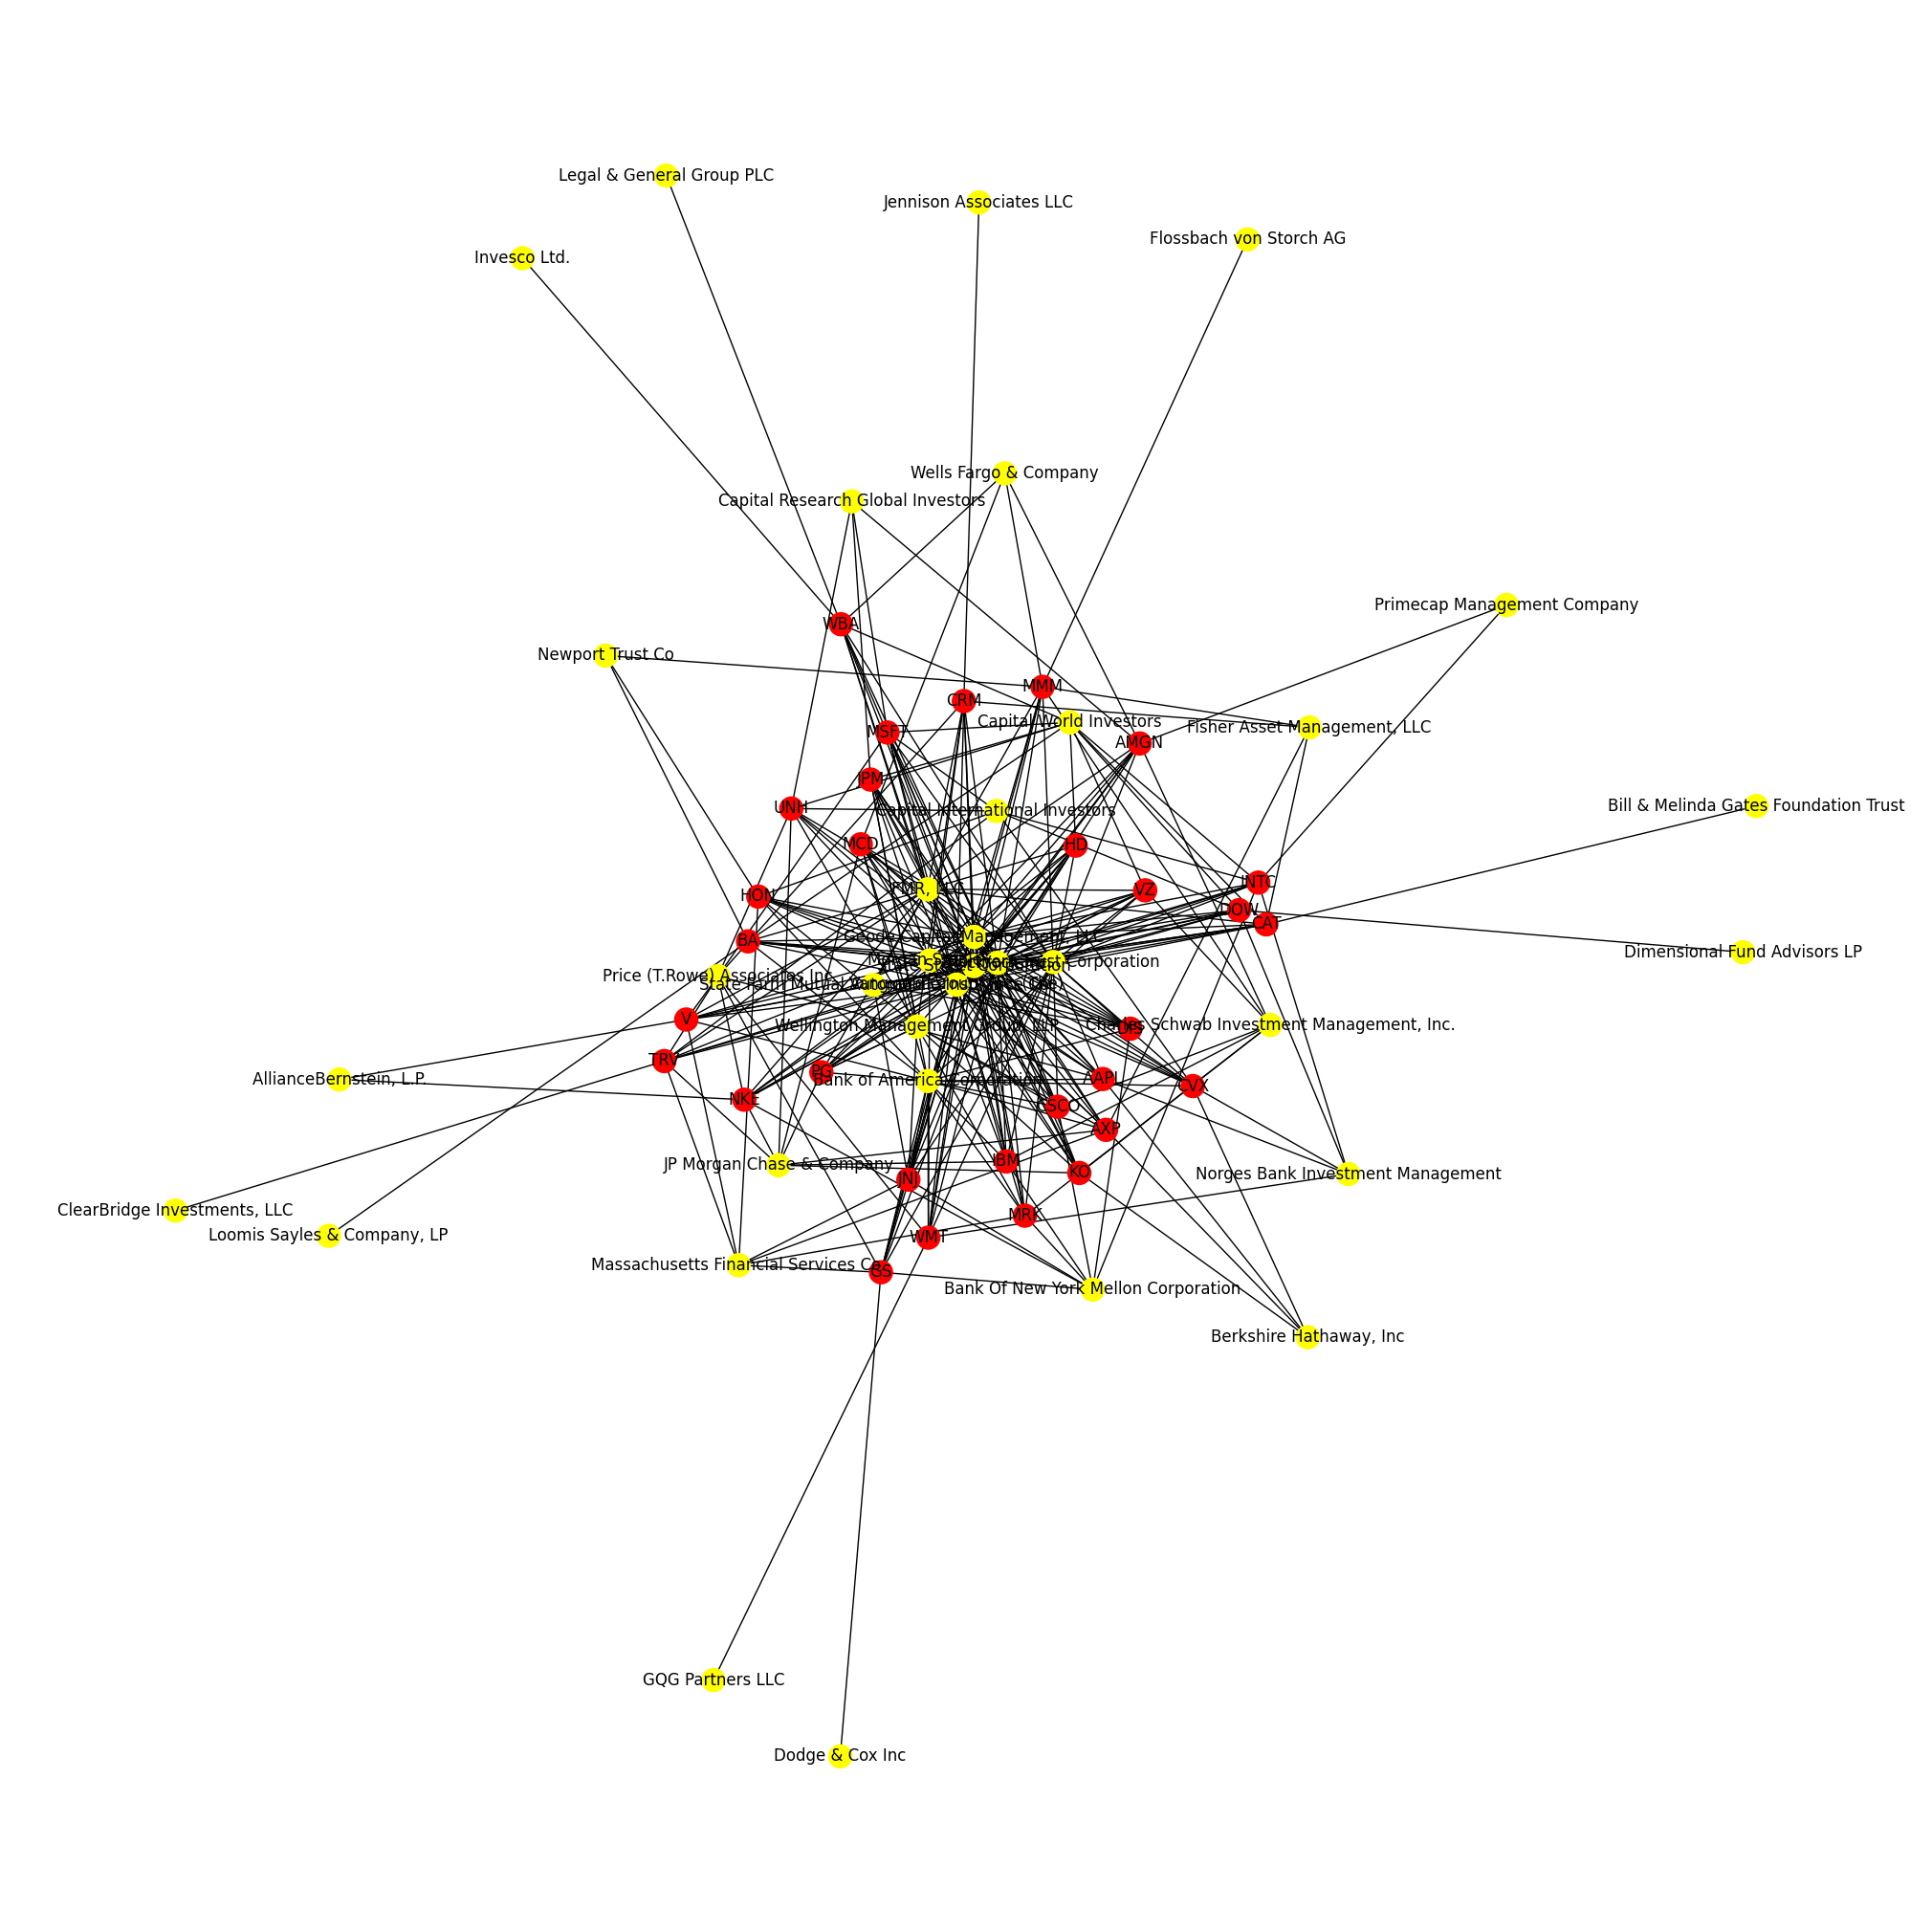

In [44]:
plt.figure(figsize=(20,20))
nx.draw(G, with_labels = True, node_color=colors)